In [30]:
from phylodeep import BD, BDEI, BDSS, FULL, SUMSTATS
from phylodeep.checkdeep import checkdeep
from phylodeep.modeldeep import modeldeep
from phylodeep.paramdeep import paramdeep
from phylodeep.encoding import encode_into_summary_statistics, encode_into_most_recent
from phylodeep.model_load import pca_scale_load, pca_data_load
from phylodeep.tree_utilities import *
import phylodeep.sumstats as sumstats

from ete3 import Tree
import inspect


In [33]:
import inspect
from phylodeep import BD, BDEI, BDSS, FULL, SUMSTATS

print(phylodeep.__file__) # Show the docstring and documentation of FULL


NameError: name 'phylodeep' is not defined

In [27]:
path_to_tree = '/Users/MiladM-Dev/Downloads/zurich.trees'
tre = Tree(path_to_tree, format=1) 
# set presumed sampling probability
sampling_proba = 0.25


In [28]:
prediction_method_options = [FULL, SUMSTATS]

### Tree stats and encoding it
SUMSTATS = 'FFNN_SUMSTATS'

FULL = 'CNN_FULL_TREE'

In [3]:
print("Tree branches",sumstats.branches(tre))

encode_into_summary_statistics(tre, sampling_proba)
df, rescale = encode_into_summary_statistics(tre, sampling_proba)
print(df)
print("Rescale factor:", rescale)

df, rescale = encode_into_most_recent(tre, sampling_proba)
print(df)
print("Rescale factor:", rescale)

Tree branches [5.174108653956917, 3.45017435, 27.11497642658904, 7.61425210488315, 6.300782724, 34.62825163418658]
         0         1    2         3         4         5         6         7   \
0  7.860106  4.191841  1.0  0.666815  1.012834  1.471607  1.217752  1.293479   

         8         9   ...       89        90        91        92        93  \
0  0.293625  0.195116  ...  0.86667  1.020979  1.480513  1.701907  1.905635   

         94        95        96        97    98  
0  2.078895  2.490283  3.701377  0.673366  0.25  

[1 rows x 99 columns]
Rescale factor: 5.174108653956917
   1000         1         3         5         7         9        11        13  \
0     0  4.126347  3.655995  4.037101  3.233294  5.044952  3.784342  4.055322   

         15        17  ...  982  984  986  988  990  992  994  996  1001  998  
0  2.695616  2.353013  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.25  0.0  

[1 rows x 1002 columns]
Rescale factor: 5.174108653956917


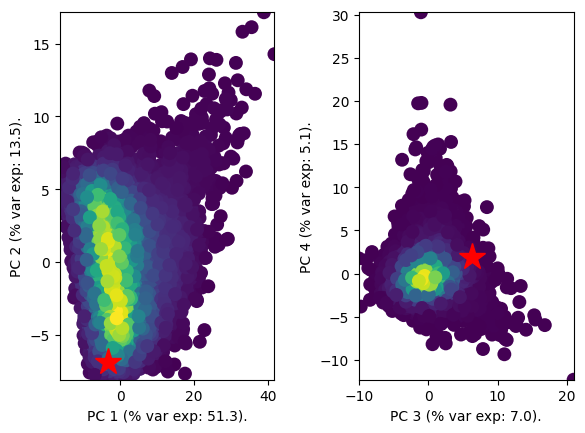

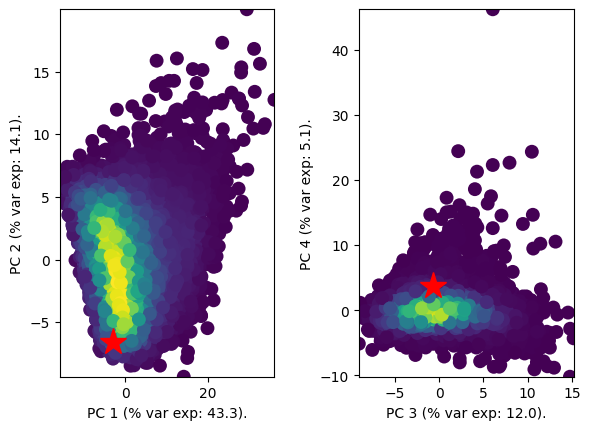

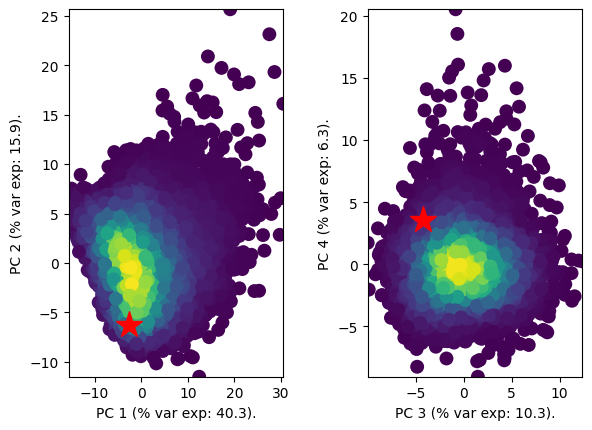

In [ ]:
# a priori check for models BD, BDEI, BDSS
checkdeep(path_to_tree, model=BD, outputfile_png='BD_a_priori_check.png')
checkdeep(path_to_tree, model=BDEI, outputfile_png='BDEI_a_priori_check.png')
checkdeep(path_to_tree, model=BDSS, outputfile_png='BDSS_a_priori_check.png')


# model selection
model_BDEI_vs_BD_vs_BDSS = modeldeep(path_to_tree, sampling_proba, vector_representation=FULL)

# the selected model is BDSS

# parameter inference
param_BDSS = paramdeep(path_to_tree, sampling_proba, model=BDSS, vector_representation=FULL, 
                                 ci_computation=True)

# for the interpretation of results, please see below